# **Analisis Kepadatan Penduduk Aceh**

##### <span style="color:green;"> Analisis kepadatan penduduk antar kabupaten dan kecamatan diperlukan untuk bisa memperkirakan seberapa besar dampak banjir pada tiap daerah di Aceh. Ini juga bisa dijadikan insight mana daerah yang paling terdampak sehingga alokasi bantuan bisa diutamakan ke sana terlebih dahulu. </span>


## Import Library

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option("display.max_rows", 200)

## Load Dataset

In [20]:
penduduk_df = pd.read_csv("Data Kepadatan Penduduk Aceh (BPS Statistik)/Kepadatan_Penduduk.csv")
penduduk_df.head(10)

,kabupaten,tahun,jumlah_penduduk_ribu,kepadatan_penduduk_km2
0,Simeulue,2019,81.1,40
1,Aceh Singkil,2019,103.2,47
2,Aceh Selatan,2019,203.2,53
3,Aceh Tenggara,2019,180.0,43
4,Aceh Timur,2019,363.0,58
5,Aceh Tengah,2019,176.5,41
6,Aceh Barat,2019,174.5,60
7,Aceh Besar,2019,353.7,119
8,Pidie,2019,381.4,124
9,Bireuen,2019,392.3,206


## Cek Struktur Data

In [21]:
penduduk_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   kabupaten               138 non-null    object 
 1   tahun                   138 non-null    int64  
 2   jumlah_penduduk_ribu    138 non-null    float64
 3   kepadatan_penduduk_km2  138 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 4.4+ KB


In [22]:
penduduk_df.describe()

,tahun,jumlah_penduduk_ribu,kepadatan_penduduk_km2
count,138.000000,138.000000,138.000000
mean,2021.500000,228.818841,343.442029
std,1.714047,140.038744,842.970227
min,2019.000000,30.900000,14.000000
25%,2020.000000,129.000000,53.000000
50%,2021.500000,190.650000,101.500000
75%,2023.000000,287.050000,180.750000
max,2024.000000,632.000000,4319.000000


## Cek Kabupaten apa saja

In [23]:
penduduk_df["kabupaten"].unique()

array(['Simeulue', 'Aceh Singkil', 'Aceh Selatan', 'Aceh Tenggara',
       'Aceh Timur', 'Aceh Tengah', 'Aceh Barat', 'Aceh Besar', 'Pidie',
       'Bireuen', 'Aceh Utara', 'Aceh Barat Daya', 'Gayo Lues',
       'Aceh Tamiang', 'Nagan Raya', 'Aceh Jaya', 'Bener Meriah',
       'Pidie Jaya', 'Kota Banda Aceh', 'Kota Sabang', 'Kota Langsa',
       'Kota Lhokseumawe', 'Kota Subulussalam'], dtype=object)

## Grafik Tren Kepadatan Penduduk

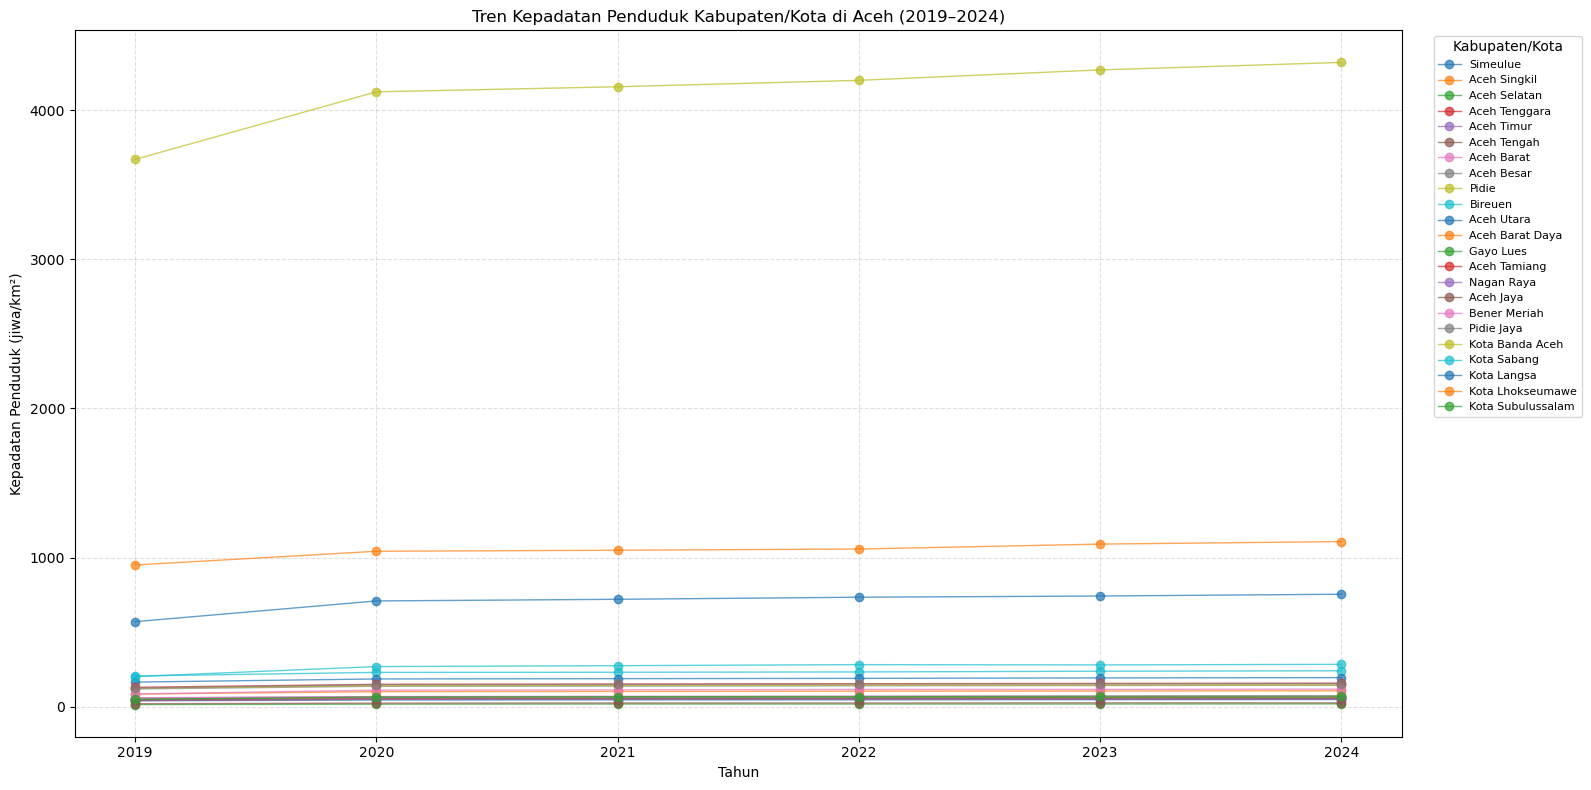

In [24]:
plt.figure(figsize=(16, 8))

for kab in penduduk_df["kabupaten"].unique():
    kab_df = penduduk_df[penduduk_df["kabupaten"] == kab]
    plt.plot(
        kab_df["tahun"],
        kab_df["kepadatan_penduduk_km2"],
        marker="o",
        linewidth=1,
        alpha=0.7,
        label=kab
    )

plt.title("Tren Kepadatan Penduduk Kabupaten/Kota di Aceh (2019–2024)")
plt.xlabel("Tahun")
plt.ylabel("Kepadatan Penduduk (jiwa/km²)")
plt.grid(True, linestyle="--", alpha=0.4)

plt.legend(
    title="Kabupaten/Kota",
    bbox_to_anchor=(1.02, 1),
    loc="upper left",
    fontsize=8
)

plt.tight_layout()
plt.show()

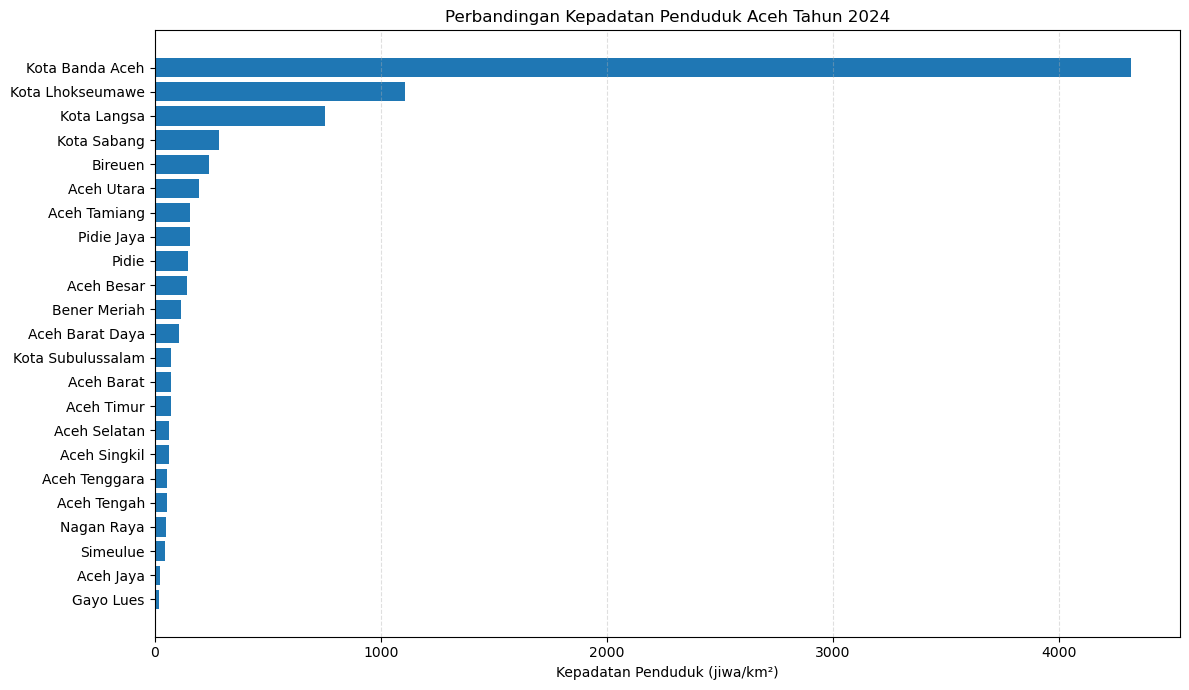

In [25]:
df_2024 = penduduk_df[penduduk_df["tahun"] == 2024] \
    .sort_values("kepadatan_penduduk_km2", ascending=False)

plt.figure(figsize=(12, 7))
plt.barh(
    df_2024["kabupaten"],
    df_2024["kepadatan_penduduk_km2"]
)

plt.title("Perbandingan Kepadatan Penduduk Aceh Tahun 2024")
plt.xlabel("Kepadatan Penduduk (jiwa/km²)")
plt.gca().invert_yaxis()
plt.grid(axis="x", linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()


In [26]:
def kategori_kepadatan(x):
    if x < 100:
        return "Rendah"
    elif x < 500:
        return "Sedang"
    elif x < 1500:
        return "Tinggi"
    else:
        return "Sangat Tinggi"

penduduk_df["kategori_risiko_manusia"] = penduduk_df[
    "kepadatan_penduduk_km2"
].apply(kategori_kepadatan)


In [27]:
df_2024 = penduduk_df[penduduk_df["tahun"] == 2024]

In [28]:
df_2024["kategori_risiko_manusia"] = df_2024[
    "kepadatan_penduduk_km2"
].apply(kategori_kepadatan)

df_2024["kategori_risiko_manusia"].value_counts()


/var/folders/56/8d3syb8j4mg02r592bf9hjc00000gn/T/ipykernel_15130/3606045795.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2024["kategori_risiko_manusia"] = df_2024[


kategori_risiko_manusia
Rendah           11
Sedang            9
Tinggi            2
Sangat Tinggi     1
Name: count, dtype: int64

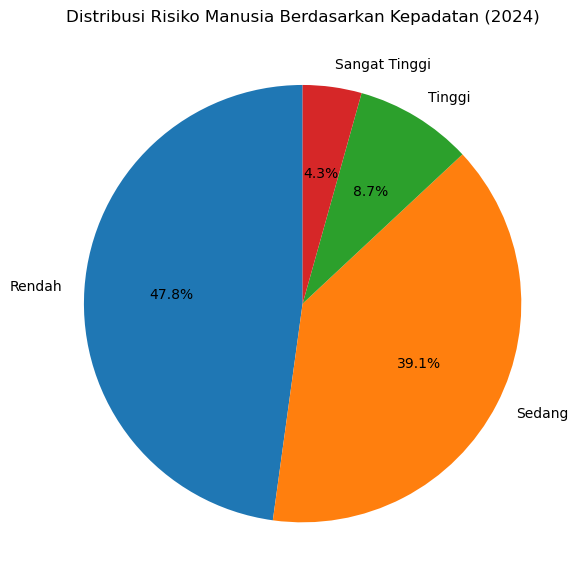

In [29]:
risk_counts = df_2024["kategori_risiko_manusia"].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(
    risk_counts,
    labels=risk_counts.index,
    autopct="%1.1f%%",
    startangle=90
)
plt.title("Distribusi Risiko Manusia Berdasarkan Kepadatan (2024)")
plt.tight_layout()
plt.show()
